In [1]:
import math
import pandas as pd
import seaborn as sns
from numpy import nan, log
from textwrap import wrap
import warnings

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

In [2]:
filepath = './data/compiled_cbm'

In [3]:
## Read in all water quality and nutrient datasets
## Convert DateTimeStamp to datetime format
ipwq = pd.read_csv(filepath + '/cbmipwq.csv')
ipwq['DateTimeStamp'] = pd.to_datetime(ipwq['DateTimeStamp'])

jbwq = pd.read_csv(filepath + '/cbmjbwq.csv')
jbwq['DateTimeStamp'] = pd.to_datetime(jbwq['DateTimeStamp'])

mbwq = pd.read_csv(filepath + '/cbmmbwq.csv')
mbwq['DateTimeStamp'] = pd.to_datetime(mbwq['DateTimeStamp'])

mcwq = pd.read_csv(filepath + '/cbmmcwq.csv')
mcwq['DateTimeStamp'] = pd.to_datetime(mcwq['DateTimeStamp'])

ocwq = pd.read_csv(filepath + '/cbmocwq.csv')
ocwq['DateTimeStamp'] = pd.to_datetime(ocwq['DateTimeStamp'])

prwq = pd.read_csv(filepath + '/cbmprwq.csv')
prwq['DateTimeStamp'] = pd.to_datetime(prwq['DateTimeStamp'])

rrwq = pd.read_csv(filepath + '/cbmrrwq.csv')
rrwq['DateTimeStamp'] = pd.to_datetime(rrwq['DateTimeStamp'])

jbmet = pd.read_csv(filepath + '/cbmjbmet.csv')
jbmet['DateTimeStamp'] = pd.to_datetime(jbmet['DateTimeStamp'])

C:\Users\julie\AppData\Local\Temp\ipykernel_18324\740767427.py:3: DtypeWarning: Columns (5,19) have mixed types. Specify dtype option on import or set low_memory=False.
  ipwq = pd.read_csv(filepath + '/cbmipwq.csv')
C:\Users\julie\AppData\Local\Temp\ipykernel_18324\740767427.py:9: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  mbwq = pd.read_csv(filepath + '/cbmmbwq.csv')
C:\Users\julie\AppData\Local\Temp\ipykernel_18324\740767427.py:12: DtypeWarning: Columns (5,19) have mixed types. Specify dtype option on import or set low_memory=False.
  mcwq = pd.read_csv(filepath + '/cbmmcwq.csv')
C:\Users\julie\AppData\Local\Temp\ipykernel_18324\740767427.py:15: DtypeWarning: Columns (5,19) have mixed types. Specify dtype option on import or set low_memory=False.
  ocwq = pd.read_csv(filepath + '/cbmocwq.csv')
C:\Users\julie\AppData\Local\Temp\ipykernel_18324\740767427.py:21: DtypeWarning: Columns (5,19) have mixed types. Specify dtype optio

In [4]:
dfList = [ipwq, jbwq, mbwq, mcwq, ocwq, prwq, rrwq, jbmet]
dfs = [df.set_index('DateTimeStamp') for df in dfList]

In [5]:
len(ipwq)

683687

In [6]:
ipwq.isnull().sum()
ipwq.notnull().sum()
#See percentage of missing data
missing = ipwq.notnull().sum() / len(ipwq) * 100
print(missing)

StationCode        100.000000
isSWMP             100.000000
DateTimeStamp      100.000000
Historical         100.000000
ProvisionalPlus    100.000000
F_Record             4.304016
Temp                94.343610
F_Temp             100.000000
SpCond              93.506093
F_SpCond           100.000000
Sal                 93.633198
F_Sal              100.000000
DO_Pct              91.928031
F_DO_Pct           100.000000
DO_mgl              91.709949
F_DO_mgl           100.000000
Depth               93.268703
F_Depth            100.000000
cDepth              57.564353
F_cDepth            78.619456
Level                0.000000
F_Level            100.000000
cLevel               0.000000
F_cLevel             0.000000
pH                  90.302287
F_pH               100.000000
Turb                90.185129
F_Turb             100.000000
ChlFluor            63.837838
F_ChlFluor         100.000000
dtype: float64


In [7]:
ipwq = ipwq.dropna(axis='columns', thresh = 27348)

In [8]:
ipwq.isnull().sum()
ipwq.notnull().sum()
#See percentage of missing data
missing = ipwq.notnull().sum() / len(ipwq) * 100
print(missing)

StationCode        100.000000
isSWMP             100.000000
DateTimeStamp      100.000000
Historical         100.000000
ProvisionalPlus    100.000000
F_Record             4.304016
Temp                94.343610
F_Temp             100.000000
SpCond              93.506093
F_SpCond           100.000000
Sal                 93.633198
F_Sal              100.000000
DO_Pct              91.928031
F_DO_Pct           100.000000
DO_mgl              91.709949
F_DO_mgl           100.000000
Depth               93.268703
F_Depth            100.000000
cDepth              57.564353
F_cDepth            78.619456
F_Level            100.000000
pH                  90.302287
F_pH               100.000000
Turb                90.185129
F_Turb             100.000000
ChlFluor            63.837838
F_ChlFluor         100.000000
dtype: float64


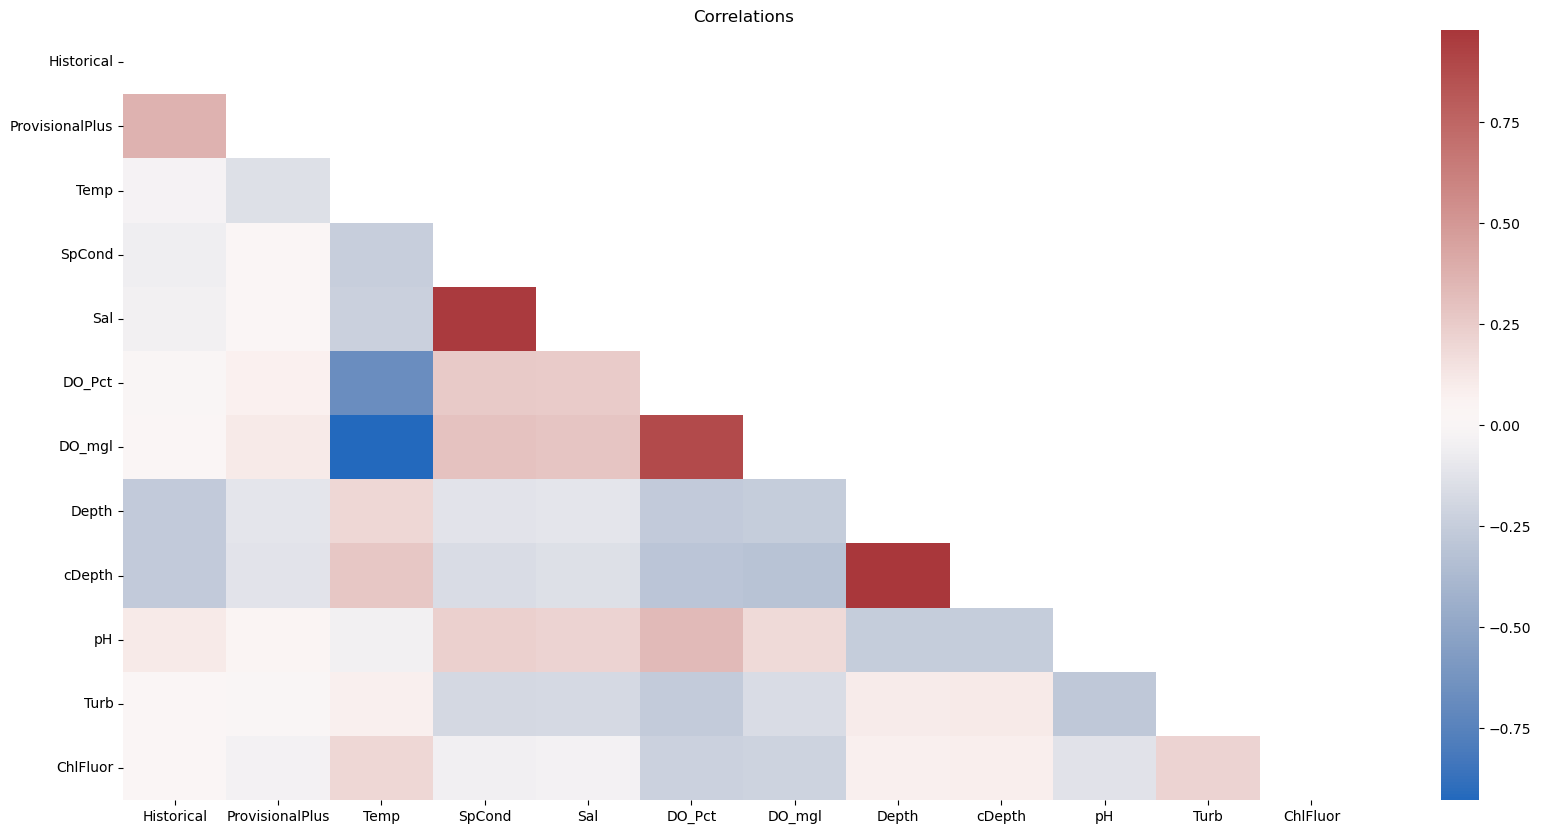

In [9]:
plt.figure(figsize=(20, 10))
plt.title('Correlations')
sns.heatmap(ipwq.corr(), annot = False, mask = np.triu(ipwq.corr()), cmap = 'vlag')
plt.show();

In [10]:
len(jbwq)

66536

In [11]:
jbwq.isnull().sum()
jbwq.notnull().sum()
#See percentage of missing data
missing = jbwq.notnull().sum() / len(jbwq) * 100
print(missing)

StationCode        100.000000
isSWMP             100.000000
DateTimeStamp      100.000000
Historical         100.000000
ProvisionalPlus    100.000000
F_Record             0.000000
Temp                84.394914
F_Temp             100.000000
SpCond              84.394914
F_SpCond           100.000000
Sal                 84.394914
F_Sal              100.000000
DO_Pct              72.218047
F_DO_Pct           100.000000
DO_mgl              72.218047
F_DO_mgl           100.000000
Depth               84.394914
F_Depth            100.000000
cDepth               0.000000
F_cDepth            54.714741
Level                0.000000
F_Level            100.000000
cLevel               0.000000
F_cLevel             0.000000
pH                  72.897379
F_pH               100.000000
Turb                 9.928460
F_Turb             100.000000
ChlFluor             0.000000
F_ChlFluor         100.000000
dtype: float64


In [12]:
jbwq = jbwq.dropna(axis='columns', thresh = 5322)

In [13]:
jbwq.isnull().sum()
jbwq.notnull().sum()
#See percentage of missing data
missing = jbwq.notnull().sum() / len(jbwq) * 100
print(missing)

StationCode        100.000000
isSWMP             100.000000
DateTimeStamp      100.000000
Historical         100.000000
ProvisionalPlus    100.000000
Temp                84.394914
F_Temp             100.000000
SpCond              84.394914
F_SpCond           100.000000
Sal                 84.394914
F_Sal              100.000000
DO_Pct              72.218047
F_DO_Pct           100.000000
DO_mgl              72.218047
F_DO_mgl           100.000000
Depth               84.394914
F_Depth            100.000000
F_cDepth            54.714741
F_Level            100.000000
pH                  72.897379
F_pH               100.000000
Turb                 9.928460
F_Turb             100.000000
F_ChlFluor         100.000000
dtype: float64


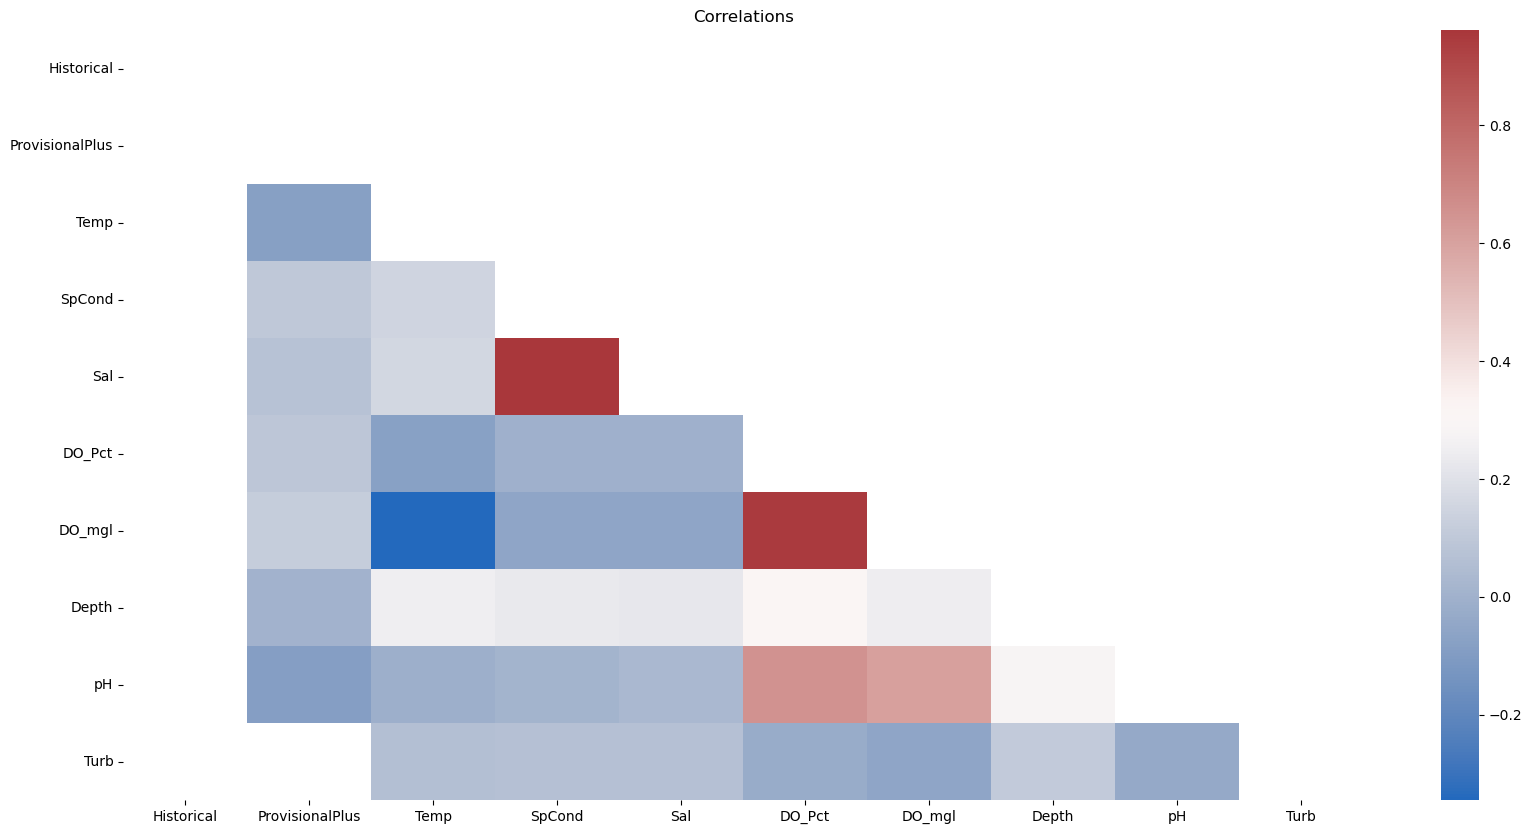

In [14]:
plt.figure(figsize=(20, 10))
plt.title('Correlations')
sns.heatmap(jbwq.corr(), annot = False, mask = np.triu(jbwq.corr()), cmap = 'vlag')
plt.show();

In [15]:
len(mbwq)

93587

In [16]:
mbwq.isnull().sum()
mbwq.notnull().sum()
#See percentage of missing data
missing = mbwq.notnull().sum() / len(mbwq) * 100
print(missing)

StationCode        100.000000
isSWMP             100.000000
DateTimeStamp      100.000000
Historical         100.000000
ProvisionalPlus    100.000000
F_Record             4.254864
Temp                98.691058
F_Temp             100.000000
SpCond              98.645111
F_SpCond           100.000000
Sal                 98.645111
F_Sal              100.000000
DO_Pct              98.682509
F_DO_Pct           100.000000
DO_mgl              98.650454
F_DO_mgl           100.000000
Depth               87.463002
F_Depth            100.000000
cDepth              85.541795
F_cDepth           100.000000
Level                0.000000
F_Level            100.000000
cLevel               0.000000
F_cLevel             0.000000
pH                  91.691154
F_pH               100.000000
Turb                99.216772
F_Turb             100.000000
ChlFluor            98.653659
F_ChlFluor         100.000000
dtype: float64


In [17]:
mbwq = mbwq.dropna(axis='columns', thresh = 3743)

In [18]:
mbwq.isnull().sum()
mbwq.notnull().sum()
#See percentage of missing data
missing = mbwq.notnull().sum() / len(mbwq) * 100
print(missing)

StationCode        100.000000
isSWMP             100.000000
DateTimeStamp      100.000000
Historical         100.000000
ProvisionalPlus    100.000000
F_Record             4.254864
Temp                98.691058
F_Temp             100.000000
SpCond              98.645111
F_SpCond           100.000000
Sal                 98.645111
F_Sal              100.000000
DO_Pct              98.682509
F_DO_Pct           100.000000
DO_mgl              98.650454
F_DO_mgl           100.000000
Depth               87.463002
F_Depth            100.000000
cDepth              85.541795
F_cDepth           100.000000
F_Level            100.000000
pH                  91.691154
F_pH               100.000000
Turb                99.216772
F_Turb             100.000000
ChlFluor            98.653659
F_ChlFluor         100.000000
dtype: float64


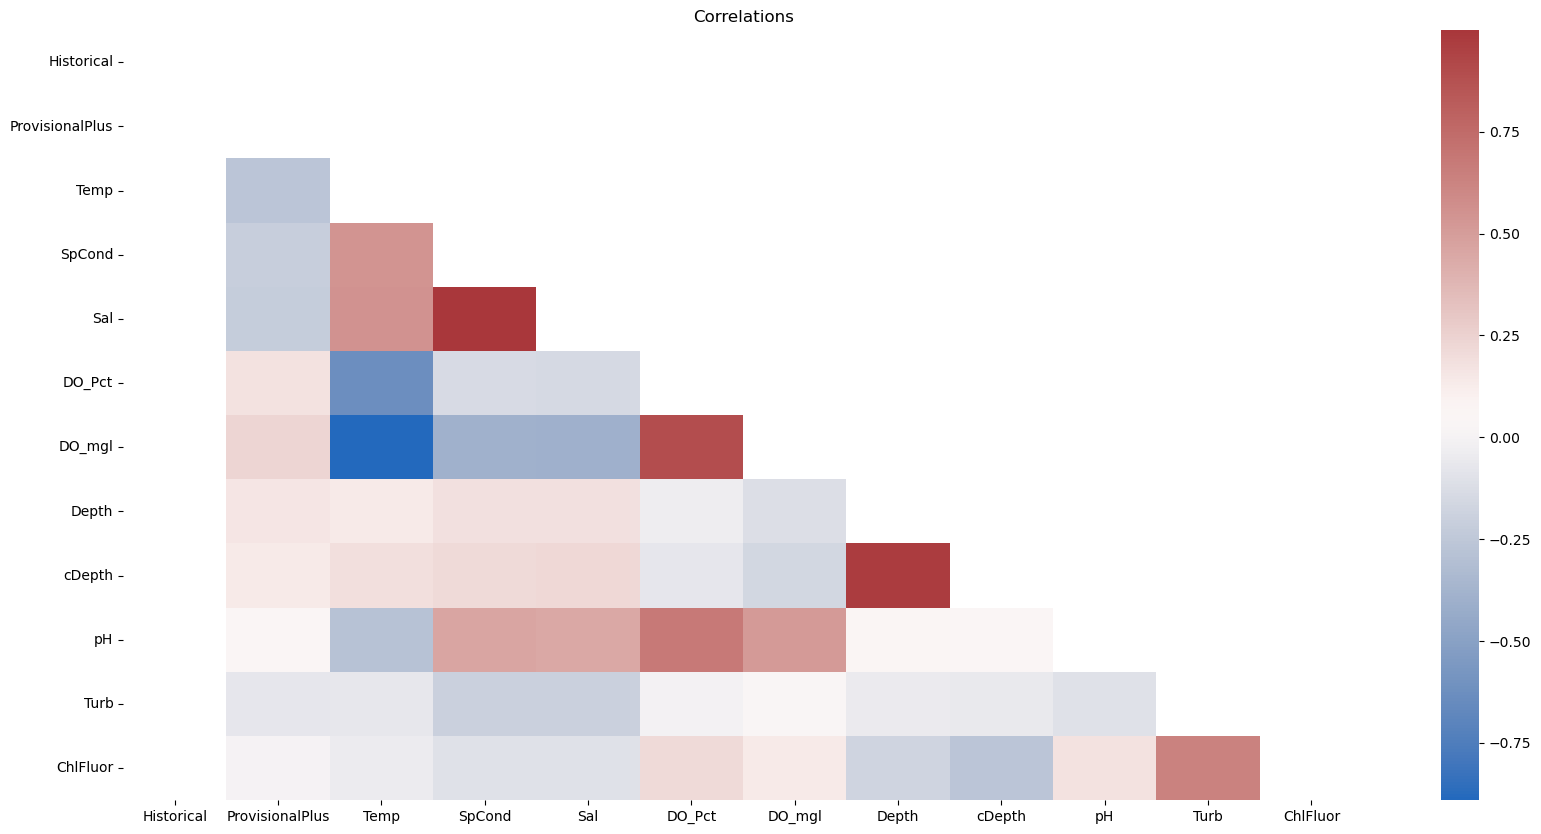

In [19]:
plt.figure(figsize=(20, 10))
plt.title('Correlations')
sns.heatmap(mbwq.corr(), annot = False, mask = np.triu(mbwq.corr()), cmap = 'vlag')
plt.show();

In [20]:
len(mcwq)

680546

In [21]:
mcwq.isnull().sum()
mcwq.notnull().sum()
#See percentage of missing data
missing = mcwq.notnull().sum() / len(mcwq) * 100
print(missing)

StationCode        100.000000
isSWMP             100.000000
DateTimeStamp      100.000000
Historical         100.000000
ProvisionalPlus    100.000000
F_Record             2.833166
Temp                76.699738
F_Temp             100.000000
SpCond              75.788705
F_SpCond           100.000000
Sal                 75.789146
F_Sal              100.000000
DO_Pct              74.654616
F_DO_Pct           100.000000
DO_mgl              74.117694
F_DO_mgl           100.000000
Depth               74.688118
F_Depth            100.000000
cDepth              44.258287
F_cDepth            64.676010
Level                0.000000
F_Level            100.000000
cLevel               0.000000
F_cLevel             0.000000
pH                  73.569898
F_pH               100.000000
Turb                72.844745
F_Turb             100.000000
ChlFluor            50.534424
F_ChlFluor         100.000000
dtype: float64


In [22]:
mcwq = mcwq.dropna(axis='columns', thresh = 13611)

In [23]:
mcwq.isnull().sum()
mcwq.notnull().sum()
#See percentage of missing data
missing = mcwq.notnull().sum() / len(mcwq) * 100
print(missing)

StationCode        100.000000
isSWMP             100.000000
DateTimeStamp      100.000000
Historical         100.000000
ProvisionalPlus    100.000000
F_Record             2.833166
Temp                76.699738
F_Temp             100.000000
SpCond              75.788705
F_SpCond           100.000000
Sal                 75.789146
F_Sal              100.000000
DO_Pct              74.654616
F_DO_Pct           100.000000
DO_mgl              74.117694
F_DO_mgl           100.000000
Depth               74.688118
F_Depth            100.000000
cDepth              44.258287
F_cDepth            64.676010
F_Level            100.000000
pH                  73.569898
F_pH               100.000000
Turb                72.844745
F_Turb             100.000000
ChlFluor            50.534424
F_ChlFluor         100.000000
dtype: float64


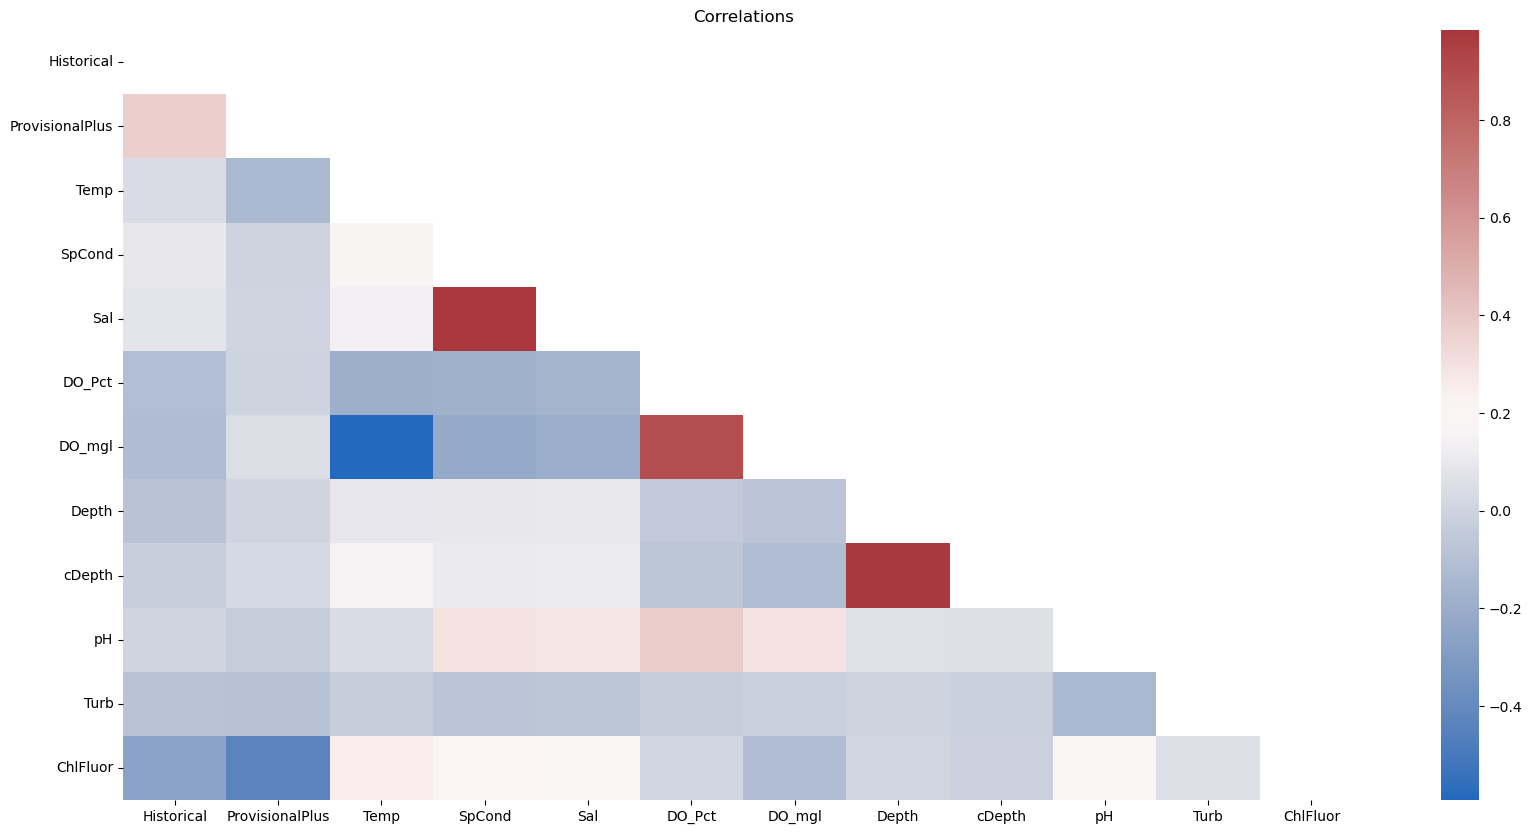

In [24]:
plt.figure(figsize=(20, 10))
plt.title('Correlations')
sns.heatmap(mcwq.corr(), annot = False, mask = np.triu(mcwq.corr()), cmap = 'vlag')
plt.show();

In [25]:
len(ocwq)

667685

In [26]:
ocwq.isnull().sum()
ocwq.notnull().sum()
#See percentage of missing data
missing = ocwq.notnull().sum() / len(ocwq) * 100
print(missing)

StationCode        100.000000
isSWMP             100.000000
DateTimeStamp      100.000000
Historical         100.000000
ProvisionalPlus    100.000000
F_Record             1.644638
Temp                73.171181
F_Temp             100.000000
SpCond              73.020811
F_SpCond           100.000000
Sal                 73.017516
F_Sal              100.000000
DO_Pct              70.910983
F_DO_Pct           100.000000
DO_mgl              70.907689
F_DO_mgl           100.000000
Depth               69.727192
F_Depth            100.000000
cDepth              43.322225
F_cDepth            58.439833
Level                0.000000
F_Level            100.000000
cLevel               0.000000
F_cLevel             0.000000
pH                  70.837146
F_pH               100.000000
Turb                70.709990
F_Turb             100.000000
ChlFluor            48.961411
F_ChlFluor         100.000000
dtype: float64


In [27]:
ocwq = ocwq.dropna(axis='columns', thresh = 6677)

In [28]:
ocwq.isnull().sum()
ocwq.notnull().sum()
#See percentage of missing data
missing = ocwq.notnull().sum() / len(ocwq) * 100
print(missing)

StationCode        100.000000
isSWMP             100.000000
DateTimeStamp      100.000000
Historical         100.000000
ProvisionalPlus    100.000000
F_Record             1.644638
Temp                73.171181
F_Temp             100.000000
SpCond              73.020811
F_SpCond           100.000000
Sal                 73.017516
F_Sal              100.000000
DO_Pct              70.910983
F_DO_Pct           100.000000
DO_mgl              70.907689
F_DO_mgl           100.000000
Depth               69.727192
F_Depth            100.000000
cDepth              43.322225
F_cDepth            58.439833
F_Level            100.000000
pH                  70.837146
F_pH               100.000000
Turb                70.709990
F_Turb             100.000000
ChlFluor            48.961411
F_ChlFluor         100.000000
dtype: float64


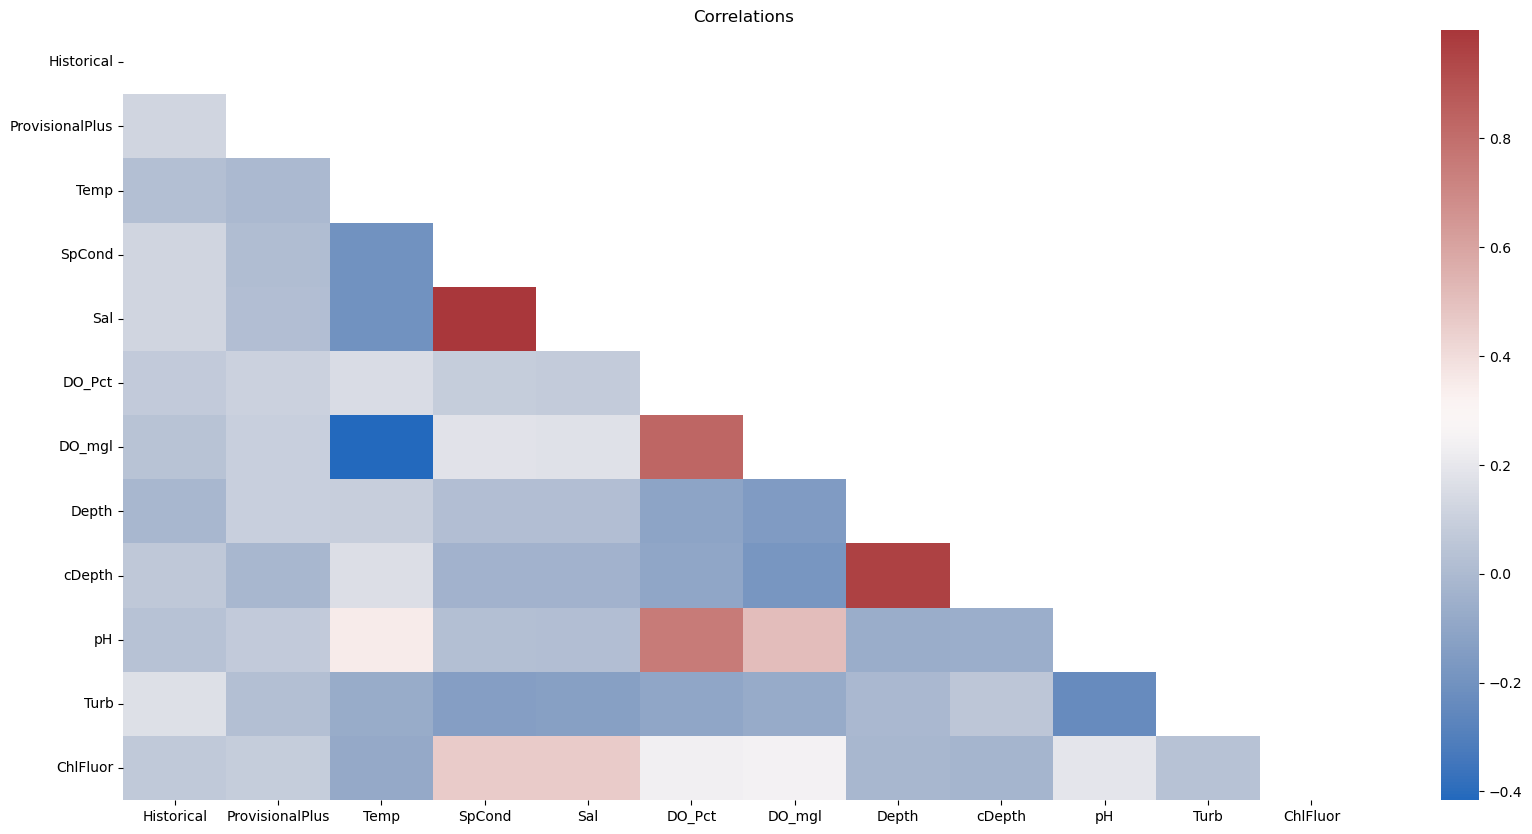

In [29]:
plt.figure(figsize=(20, 10))
plt.title('Correlations')
sns.heatmap(ocwq.corr(), annot = False, mask = np.triu(ocwq.corr()), cmap = 'vlag')
plt.show();

In [30]:
len(prwq)

56437

In [31]:
prwq.isnull().sum()
prwq.notnull().sum()
#See percentage of missing data
missing = prwq.notnull().sum() / len(prwq) * 100
print(missing)

StationCode        100.000000
isSWMP             100.000000
DateTimeStamp      100.000000
Historical         100.000000
ProvisionalPlus    100.000000
F_Record             0.000000
Temp                83.888229
F_Temp             100.000000
SpCond              83.886457
F_SpCond           100.000000
Sal                 83.886457
F_Sal              100.000000
DO_Pct              66.569803
F_DO_Pct           100.000000
DO_mgl              66.566260
F_DO_mgl           100.000000
Depth               82.965076
F_Depth            100.000000
cDepth               0.000000
F_cDepth            56.875808
Level                0.000000
F_Level            100.000000
cLevel               0.000000
F_cLevel             0.000000
pH                  71.880150
F_pH               100.000000
Turb                20.403282
F_Turb             100.000000
ChlFluor             0.000000
F_ChlFluor         100.000000
dtype: float64


In [32]:
prwq = prwq.dropna(axis='columns', thresh = 1000)

In [33]:
prwq.isnull().sum()
prwq.notnull().sum()
#See percentage of missing data
missing = prwq.notnull().sum() / len(prwq) * 100
print(missing)

StationCode        100.000000
isSWMP             100.000000
DateTimeStamp      100.000000
Historical         100.000000
ProvisionalPlus    100.000000
Temp                83.888229
F_Temp             100.000000
SpCond              83.886457
F_SpCond           100.000000
Sal                 83.886457
F_Sal              100.000000
DO_Pct              66.569803
F_DO_Pct           100.000000
DO_mgl              66.566260
F_DO_mgl           100.000000
Depth               82.965076
F_Depth            100.000000
F_cDepth            56.875808
F_Level            100.000000
pH                  71.880150
F_pH               100.000000
Turb                20.403282
F_Turb             100.000000
F_ChlFluor         100.000000
dtype: float64


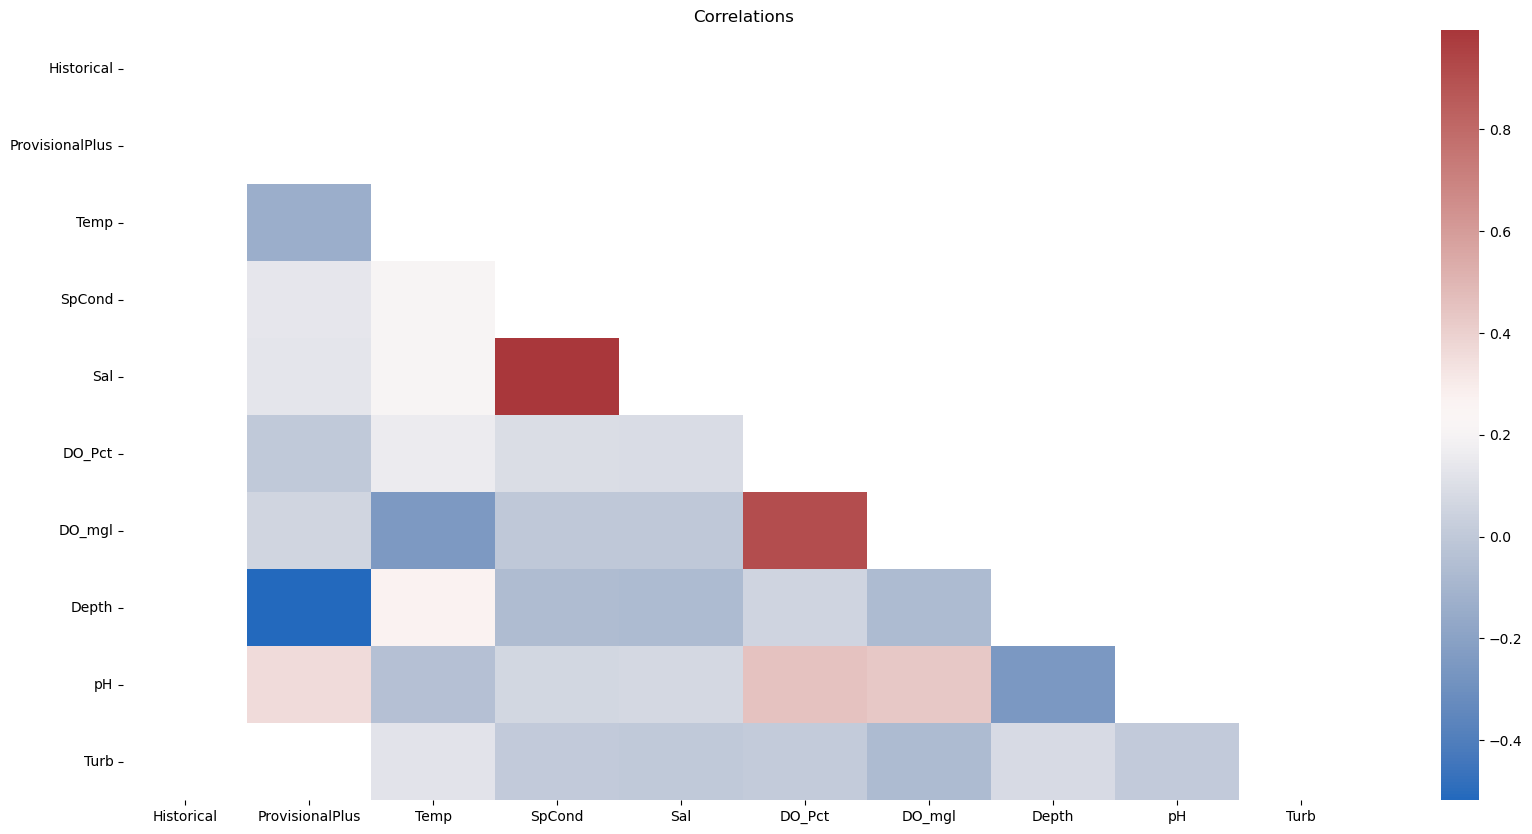

In [34]:
plt.figure(figsize=(20, 10))
plt.title('Correlations')
sns.heatmap(prwq.corr(), annot = False, mask = np.triu(prwq.corr()), cmap = 'vlag')
plt.show();

In [35]:
len(rrwq)

685399

In [36]:
rrwq.isnull().sum()
rrwq.notnull().sum()
#See percentage of missing data
missing = rrwq.notnull().sum() / len(rrwq) * 100
print(missing)

StationCode        100.000000
isSWMP             100.000000
DateTimeStamp      100.000000
Historical         100.000000
ProvisionalPlus    100.000000
F_Record             2.898020
Temp                97.392760
F_Temp             100.000000
SpCond              97.072946
F_SpCond           100.000000
Sal                 97.072946
F_Sal              100.000000
DO_Pct              94.238247
F_DO_Pct           100.000000
DO_mgl              94.165442
F_DO_mgl           100.000000
Depth               95.750650
F_Depth            100.000000
cDepth              58.573036
F_cDepth            80.220135
Level                0.000000
F_Level            100.000000
cLevel               0.000000
F_cLevel             0.000000
pH                  91.479853
F_pH               100.000000
Turb                94.699292
F_Turb             100.000000
ChlFluor            67.188309
F_ChlFluor         100.000000
dtype: float64


In [37]:
rrwq = rrwq.dropna(axis='columns', thresh = 13706)

In [38]:
rrwq.isnull().sum()
rrwq.notnull().sum()
#See percentage of missing data
missing = rrwq.notnull().sum() / len(rrwq) * 100
print(missing)

StationCode        100.000000
isSWMP             100.000000
DateTimeStamp      100.000000
Historical         100.000000
ProvisionalPlus    100.000000
F_Record             2.898020
Temp                97.392760
F_Temp             100.000000
SpCond              97.072946
F_SpCond           100.000000
Sal                 97.072946
F_Sal              100.000000
DO_Pct              94.238247
F_DO_Pct           100.000000
DO_mgl              94.165442
F_DO_mgl           100.000000
Depth               95.750650
F_Depth            100.000000
cDepth              58.573036
F_cDepth            80.220135
F_Level            100.000000
pH                  91.479853
F_pH               100.000000
Turb                94.699292
F_Turb             100.000000
ChlFluor            67.188309
F_ChlFluor         100.000000
dtype: float64


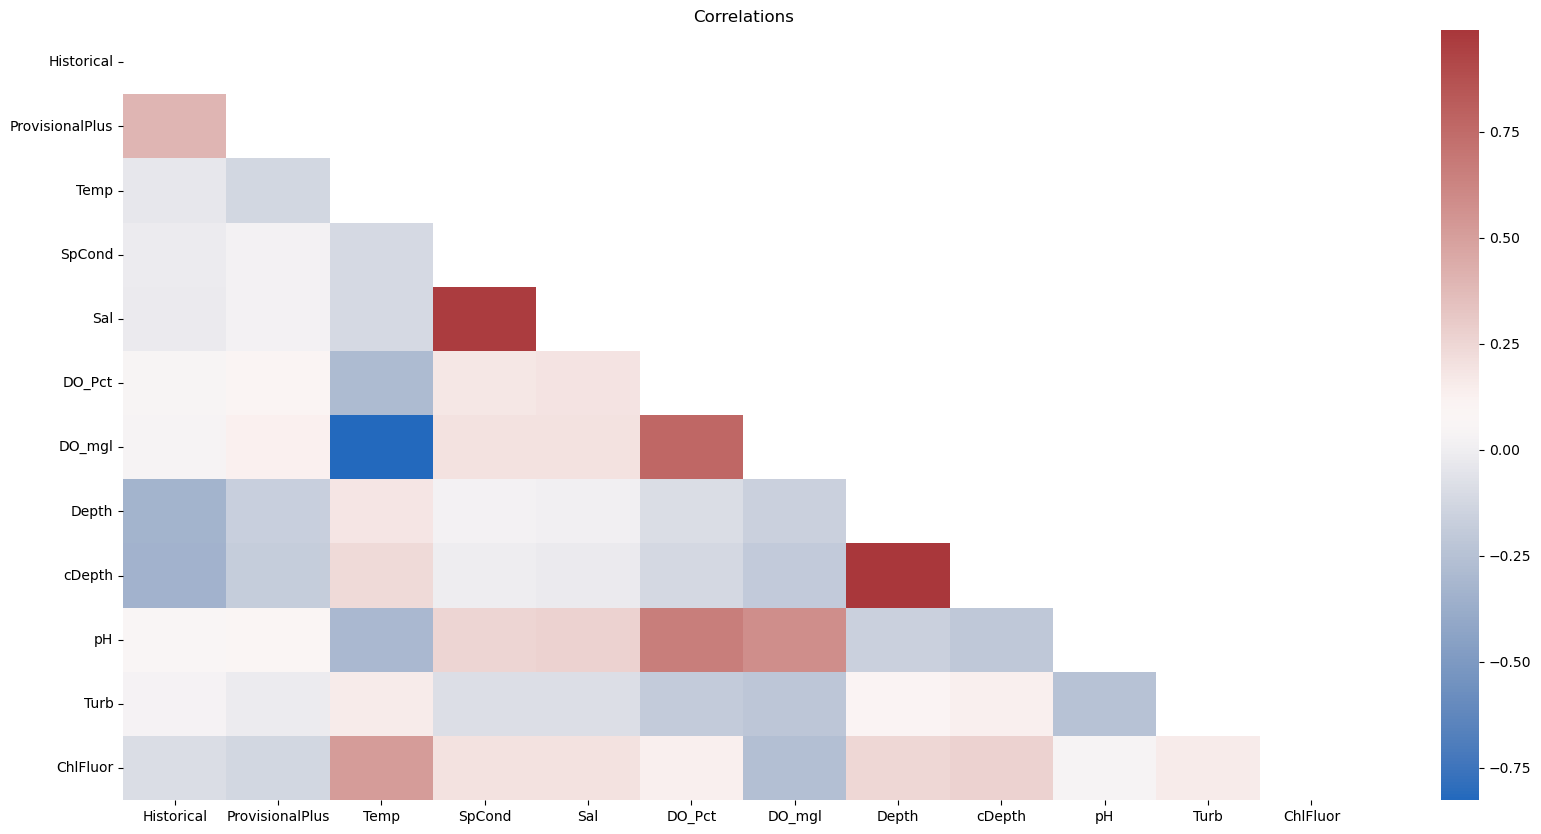

In [39]:
plt.figure(figsize=(20, 10))
plt.title('Correlations')
sns.heatmap(rrwq.corr(), annot = False, mask = np.triu(rrwq.corr()), cmap = 'vlag')
plt.show();

In [40]:
len(jbmet)

674933

In [41]:
jbmet.isnull().sum()
jbmet.notnull().sum()
#See percentage of missing data
missing = jbmet.notnull().sum() / len(jbmet) * 100
print(missing)

StationCode        100.000000
isSWMP             100.000000
DateTimeStamp      100.000000
Historical         100.000000
ProvisionalPlus    100.000000
Frequency          100.000000
F_Record             8.751387
ATemp               96.690634
F_ATemp            100.000000
RH                  91.609093
F_RH               100.000000
BP                  97.235726
F_BP               100.000000
WSpd                96.755233
F_WSpd             100.000000
MaxWSpd             90.594918
F_MaxWSpd          100.000000
MaxWSpdT            93.872725
Wdir                97.139864
F_Wdir             100.000000
SDWDir              87.052344
F_SDWDir           100.000000
TotPAR              95.369318
F_TotPAR           100.000000
TotPrcp             94.846600
F_TotPrcp          100.000000
TotSoRad             0.000000
F_TotSoRad         100.000000
dtype: float64


In [42]:
jbmet = jbmet.dropna(axis='columns', thresh = 13499)

In [43]:
jbmet.isnull().sum()
jbmet.notnull().sum()
#See percentage of missing data
missing = jbmet.notnull().sum() / len(jbmet) * 100
print(missing)

StationCode        100.000000
isSWMP             100.000000
DateTimeStamp      100.000000
Historical         100.000000
ProvisionalPlus    100.000000
Frequency          100.000000
F_Record             8.751387
ATemp               96.690634
F_ATemp            100.000000
RH                  91.609093
F_RH               100.000000
BP                  97.235726
F_BP               100.000000
WSpd                96.755233
F_WSpd             100.000000
MaxWSpd             90.594918
F_MaxWSpd          100.000000
MaxWSpdT            93.872725
Wdir                97.139864
F_Wdir             100.000000
SDWDir              87.052344
F_SDWDir           100.000000
TotPAR              95.369318
F_TotPAR           100.000000
TotPrcp             94.846600
F_TotPrcp          100.000000
F_TotSoRad         100.000000
dtype: float64


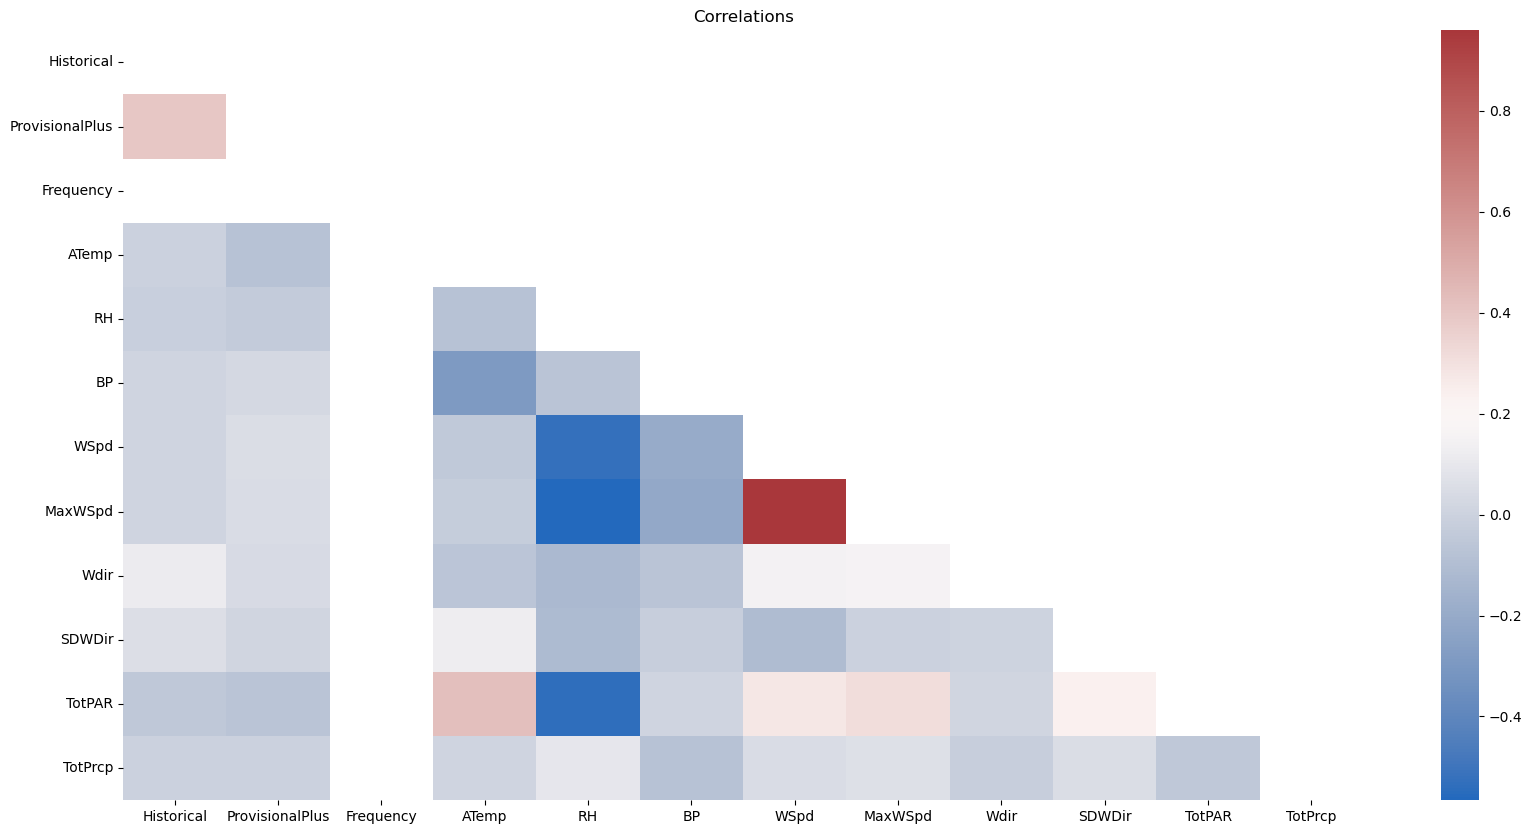

In [44]:
plt.figure(figsize=(20, 10))
plt.title('Correlations')
sns.heatmap(jbmet.corr(), annot = False, mask = np.triu(jbmet.corr()), cmap = 'vlag')
plt.show();

In [45]:
## Merge all dataframes
df1 = pd.merge(ipwq, jbwq, how='outer', on='DateTimeStamp', suffixes = ('_ip','_jbq'))
df2 = pd.merge(mbwq, mcwq, how='outer', on='DateTimeStamp', suffixes = ('_mb','_mc'))
df3 = pd.merge(ocwq, prwq, how='outer', on='DateTimeStamp', suffixes = ('_oc','_pr'))
df4 = pd.merge(rrwq, jbmet, how='outer', on='DateTimeStamp', suffixes = ('_rr','_jbm'))

df5 = pd.merge(df1, df2, how='outer', on='DateTimeStamp')
df6 = pd.merge(df3, df4, how='outer', on='DateTimeStamp')

df = pd.merge(df5, df6, how='outer', on='DateTimeStamp')

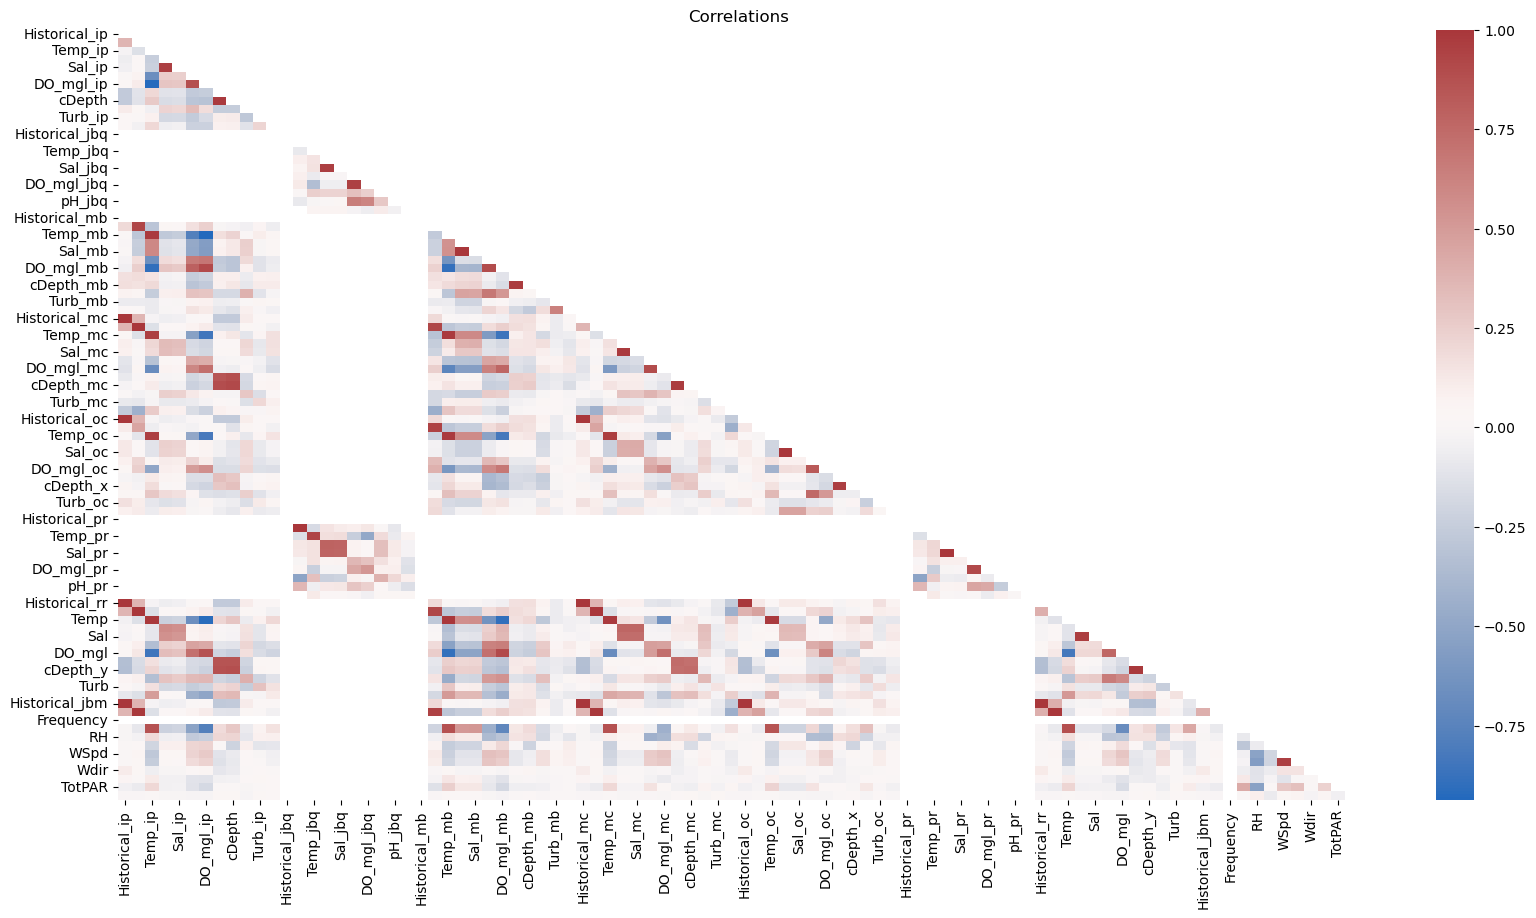

In [46]:
## Plot as a heatmap

plt.figure(figsize=(20, 10))
plt.title('Correlations')
sns.heatmap(df.corr(), annot = False, mask = np.triu(df.corr()), cmap = 'vlag')
plt.show();

In [47]:
df.corr()

,Historical_ip,ProvisionalPlus_ip,Temp_ip,SpCond_ip,Sal_ip,DO_Pct_ip,DO_mgl_ip,Depth_ip,cDepth,pH_ip,...,Frequency,ATemp,RH,BP,WSpd,MaxWSpd,Wdir,SDWDir,TotPAR,TotPrcp
Historical_ip,1.000000,0.371674,-0.027298,-0.059064,-0.049510,0.004808,0.024632,-0.270702,-0.268836,0.108261,...,NaN,-0.006984,-0.011788,0.009921,0.006985,0.008088,0.114076,0.056739,-0.049044,-0.001663
ProvisionalPlus_ip,0.371674,1.000000,-0.139754,0.024282,0.020216,0.074519,0.112118,-0.114722,-0.123018,0.043601,...,NaN,-0.096796,-0.032789,0.024632,0.050196,0.045298,0.033093,0.010529,-0.076710,-0.003489
Temp_ip,-0.027298,-0.139754,1.000000,-0.244223,-0.228362,-0.669392,-0.928250,0.199751,0.271223,-0.046594,...,NaN,0.864664,0.184812,-0.196162,-0.282169,-0.249079,-0.055823,0.115078,0.203715,0.014893
SpCond_ip,-0.059064,0.024282,-0.244223,1.000000,0.957320,0.256183,0.296020,-0.123659,-0.162898,0.228341,...,NaN,-0.223951,-0.053019,0.089323,0.040305,0.032192,-0.008843,-0.042428,-0.037207,-0.010270
Sal_ip,-0.049510,0.020216,-0.228362,0.957320,1.000000,0.250483,0.283684,-0.112715,-0.143159,0.213071,...,NaN,-0.208026,-0.045482,0.088158,0.034907,0.029166,-0.009769,-0.039113,-0.034396,-0.009712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MaxWSpd,0.008088,0.045298,-0.249079,0.032192,0.029166,0.189001,0.231520,-0.127288,-0.088203,0.028490,...,NaN,-0.024577,-0.565958,-0.210029,0.959065,1.000000,0.152213,-0.004308,0.314906,0.064734
Wdir,0.114076,0.033093,-0.055823,-0.008843,-0.009769,0.025256,0.049970,-0.100647,-0.078710,0.008219,...,NaN,-0.060220,-0.122306,-0.068756,0.145333,0.152213,1.000000,0.005414,0.013790,-0.023150
SDWDir,0.056739,0.010529,0.115078,-0.042428,-0.039113,-0.114765,-0.122626,-0.039550,-0.034309,0.016932,...,NaN,0.123073,-0.118834,-0.021546,-0.112090,-0.004308,0.005414,1.000000,0.235490,0.047715
TotPAR,-0.049044,-0.076710,0.203715,-0.037207,-0.034396,-0.126307,-0.179867,0.005071,0.001712,-0.012517,...,NaN,0.423013,-0.540003,0.009233,0.275096,0.314906,0.013790,0.235490,1.000000,-0.050472


In [48]:
df.describe(include=['number'])

,Historical_ip,ProvisionalPlus_ip,Temp_ip,SpCond_ip,Sal_ip,DO_Pct_ip,DO_mgl_ip,Depth_ip,cDepth,pH_ip,...,Frequency,ATemp,RH,BP,WSpd,MaxWSpd,Wdir,SDWDir,TotPAR,TotPrcp
count,683687.000000,683687.000000,645015.000000,639289.000000,640158.000000,628500.000000,627009.000000,637666.000000,393560.000000,617385.000000,...,674933.0,652597.000000,618300.000000,656276.000000,653033.000000,611455.000000,655629.000000,587545.000000,643679.000000,640151.000000
mean,0.910089,0.986536,16.097967,0.457375,0.225673,83.521321,8.450968,1.489550,1.514515,7.206024,...,15.0,13.913794,73.983697,1017.203520,1.745771,3.319493,194.594371,20.916034,278.079152,0.032542
std,0.286054,0.115250,6.588135,0.187929,0.098736,10.843782,2.113150,0.348147,0.350603,0.214068,...,0.0,9.971720,21.484256,7.614194,1.554257,2.691216,110.449843,14.908286,422.731584,0.314194
min,0.000000,0.000000,0.300000,0.080000,0.000000,1.100000,0.100000,0.000000,0.300000,6.100000,...,15.0,-99.000000,-99.000000,-99.000000,0.000000,0.000000,0.000000,0.000000,-99.000000,0.000000
25%,1.000000,1.000000,10.200000,0.370000,0.200000,76.400000,6.700000,1.240000,1.270000,7.100000,...,15.0,6.000000,56.000000,1013.000000,0.400000,1.300000,113.000000,12.000000,0.000000,0.000000
50%,1.000000,1.000000,16.700000,0.440000,0.200000,83.800000,8.000000,1.500000,1.530000,7.200000,...,15.0,14.600000,79.000000,1017.000000,1.400000,2.800000,186.000000,18.000000,12.000000,0.000000
75%,1.000000,1.000000,22.400000,0.510000,0.300000,91.800000,10.300000,1.730000,1.770000,7.300000,...,15.0,21.800000,94.000000,1022.000000,2.600000,4.700000,307.000000,26.000000,448.100000,0.000000
max,1.000000,1.000000,27.700000,4.150000,2.200000,177.700000,14.500000,3.740000,3.740000,10.100000,...,15.0,41.600000,103.000000,1045.000000,16.100000,27.100000,360.000000,104.000000,3071.400000,32.300000


In [49]:
df.describe(exclude=['number'])

C:\Users\julie\AppData\Local\Temp\ipykernel_18324\1418341588.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(exclude=['number'])


,StationCode_ip,isSWMP_ip,DateTimeStamp,F_Record_x,F_Temp_ip,F_SpCond_ip,F_Sal_ip,F_DO_Pct_ip,F_DO_mgl_ip,F_Depth_ip,...,F_RH,F_BP,F_WSpd,F_MaxWSpd,MaxWSpdT,F_Wdir,F_SDWDir,F_TotPAR,F_TotPrcp,F_TotSoRad
count,683687,683687,752734,29426,683687,683687,683687,683687,683687,683687,...,674933,674933,674933,674933,633578,674933,674933,674933,674933,674933
unique,1,1,752734,9,29,41,39,52,51,39,...,36,32,32,30,2040,32,27,43,43,1
top,cbmipwq,P,2003-04-04 14:00:00,{CSM},<0>,<0>,<0>,<0>,<0>,<0>,...,<0>,<0>,<0>,<0>,22:30,<0>,<0>,<0>,<0>,<-1>
freq,683687,683687,1,18206,513335,500992,500992,495620,493824,509990,...,372904,501144,457169,424845,2145,459626,402880,332218,351983,674933
first,NaN,NaN,1995-07-06 15:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2022-10-21 03:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
df.head(20)

,StationCode_ip,isSWMP_ip,DateTimeStamp,Historical_ip,ProvisionalPlus_ip,F_Record_x,Temp_ip,F_Temp_ip,SpCond_ip,F_SpCond_ip,...,MaxWSpdT,Wdir,F_Wdir,SDWDir,F_SDWDir,TotPAR,F_TotPAR,TotPrcp,F_TotPrcp,F_TotSoRad
0,cbmipwq,P,2003-04-04 14:00:00,1.0,1.0,NaN,14.1,<4>,0.38,<4>,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,cbmipwq,P,2003-04-04 14:15:00,1.0,1.0,NaN,14.1,<4>,0.38,<4>,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,cbmipwq,P,2003-04-04 14:30:00,1.0,1.0,NaN,14.2,<4>,0.39,<4>,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,cbmipwq,P,2003-04-04 14:45:00,1.0,1.0,NaN,14.3,<4>,0.39,<4>,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,cbmipwq,P,2003-04-04 15:00:00,1.0,1.0,NaN,14.3,<4>,0.39,<4>,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,cbmipwq,P,2003-04-04 15:15:00,1.0,1.0,NaN,14.3,<4>,0.40,<4>,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,cbmipwq,P,2003-04-04 15:30:00,1.0,1.0,NaN,14.3,<4>,0.40,<4>,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,cbmipwq,P,2003-04-04 15:45:00,1.0,1.0,NaN,14.3,<4>,0.40,<4>,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,cbmipwq,P,2003-04-04 16:00:00,1.0,1.0,NaN,14.3,<4>,0.40,<4>,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,cbmipwq,P,2003-04-04 16:15:00,1.0,1.0,NaN,14.3,<4>,0.40,<4>,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
#df1.to_csv('df1.csv')
#df2.to_csv('df2.csv')
#df3.to_csv('df3.csv')
#df4.to_csv('df4.csv')
#df5.to_csv('df5.csv')
#df6.to_csv('df6.csv')
#df.to_csv('df.csv')

In [ ]:
def build_continuous_features_report(data_df):

    """Build tabular report for continuous features"""

    stats = {
        "Count": len,
        "Miss %": lambda df: df.isna().sum() / len(df) * 100,
        "Card.": lambda df: df.nunique(),
        "Min": lambda df: df.min(),
        "1st Qrt.": lambda df: df.quantile(0.25),
        "Mean": lambda df: df.mean(),
        "Median": lambda df: df.median(),
        "3rd Qrt": lambda df: df.quantile(0.75),
        "Max": lambda df: df.max(),
        "Std. Dev.": lambda df: df.std(),
    }

    contin_feat_names = data_df.select_dtypes("number").columns
    continuous_data_df = data_df[contin_feat_names]

    report_df = pd.DataFrame(index=contin_feat_names, columns=stats.keys())

    for stat_name, fn in stats.items():
        # NOTE: ignore warnings for empty features
        with warnings.catch_warnings():
            warnings.simplefilter("ignore", category=RuntimeWarning)
            report_df[stat_name] = fn(continuous_data_df)

    return report_df